In [1]:
import pandas as pd 

hamilton_data= pd.read_csv("Networking-sheets-originals - Hamilton-Edges.csv")
hamilton_data.head()

/Users/morganfox/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/morganfox/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,From Type,From Name,Edge Type,To Type,To Name,Date,Weight,NRS Reference
0,Person,Duchess of Hamilton,WROTE LETTER TO,Person,Unknown,c 1690,NaN,GD406/1/3049
1,Person,Sunderland,WROTE LETTER TO,Person,Arran,"1690, May 24",NaN,GD406/1/3189
2,Person,Charles Spencer,WROTE LETTER TO,Person,Arran,"1692, Oct 24",NaN,GD406/1/3213
3,Person,George MacKenzie,WROTE LETTER TO,Person,Arran,c 1691,NaN,GD406/1/3363
4,Person,Breadalbane,WROTE LETTER TO,Person,Arran,"1690, May 8",NaN,GD406/1/3371


In [2]:
hamilton_data.drop('Weight', axis=1)

,From Type,From Name,Edge Type,To Type,To Name,Date,NRS Reference
0,Person,Duchess of Hamilton,WROTE LETTER TO,Person,Unknown,c 1690,GD406/1/3049
1,Person,Sunderland,WROTE LETTER TO,Person,Arran,"1690, May 24",GD406/1/3189
2,Person,Charles Spencer,WROTE LETTER TO,Person,Arran,"1692, Oct 24",GD406/1/3213
3,Person,George MacKenzie,WROTE LETTER TO,Person,Arran,c 1691,GD406/1/3363
4,Person,Breadalbane,WROTE LETTER TO,Person,Arran,"1690, May 8",GD406/1/3371
...,...,...,...,...,...,...,...
776,Person,Alexander Smith,WROTE LETTER TO,Person,Mrs. Tylor,"1690, May 27",GD406/1/11959
777,Person,Robert Lloyd,WROTE LETTER TO,Person,Lady Gerard,"1690, May 23",GD406/1/11988
778,Person,George Mackenzie,WROTE LETTER TO,Person,Sheriff Depute Lanark,"1688, Sep 19",GD406/1/11989/1
779,Person,W.B.,WROTE LETTER TO,Person,Mr. Ward,"1691, May 7",GD406/1/11990


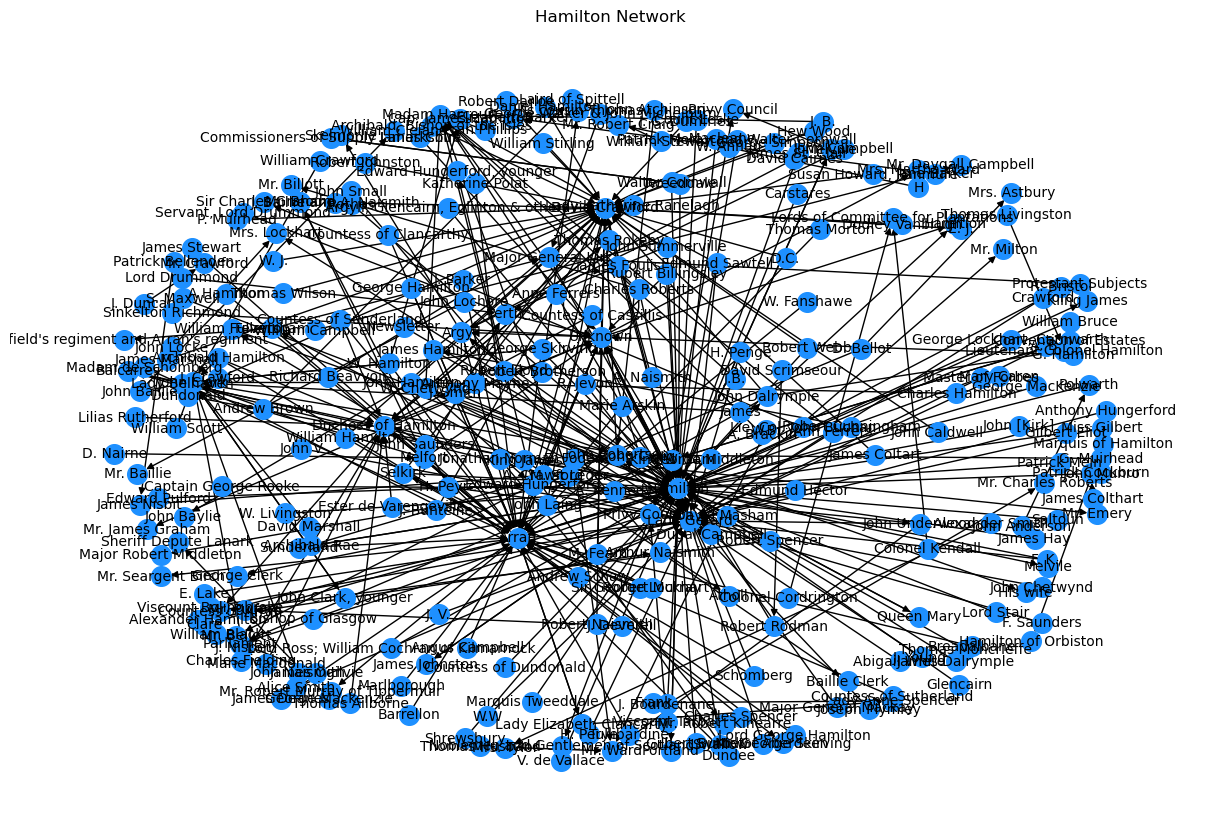

In [3]:
import networkx as nx 
import matplotlib.pyplot as plt 

G= nx.DiGraph()
for idx, row in hamilton_data.iterrows():
    G.add_edge(row['From Name'], row['To Name'])
    
plt.figure(figsize=(12,8))
pos= nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, node_color='dodgerblue', edge_color='black', node_size=200,font_size=10)
plt.title("Hamilton Network")
plt.show()


#more dense than melville, interesting considering hamilton is commisioner in parliament 

In [4]:
#Top senders
sender_count=hamilton_data['From Name'].value_counts()
print(sender_count.head(10))

From Name
Hamilton               116
Unknown                 47
Melville                41
Selkirk                 39
William Hamilton        21
King William            21
John Dalrymple          17
Arran                   16
Duchess of Hamilton     15
John Hamilton           15
Name: count, dtype: int64


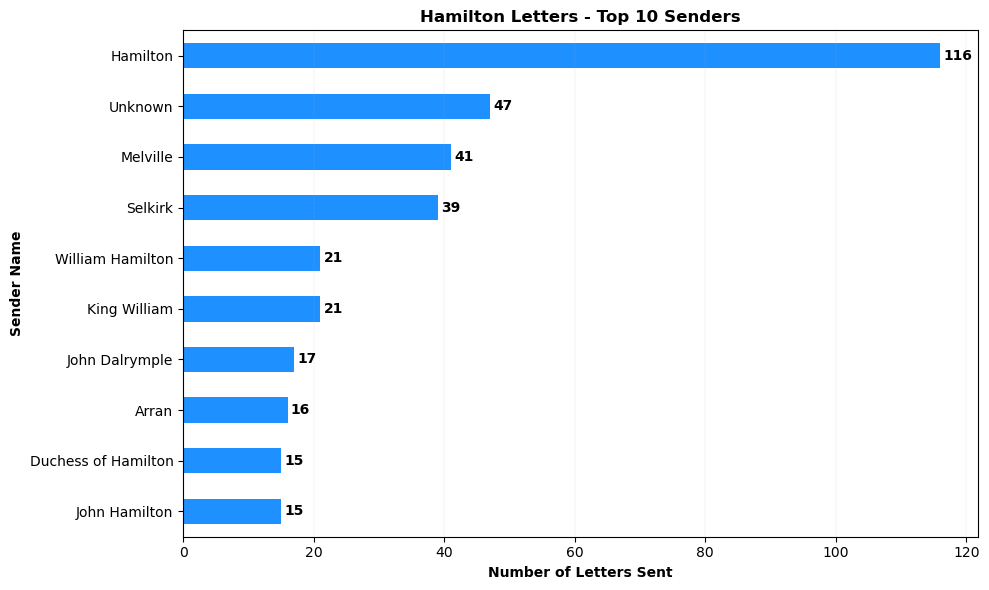

In [21]:
import matplotlib.pyplot as plt 
hamilton_top_senders = sender_count.head(10)

plt.figure(figsize=(10,6))
ax = hamilton_top_senders.plot(kind='barh', color='dodgerblue')

plt.xlabel("Number of Letters Sent", weight='bold')
plt.ylabel("Sender Name", weight="bold")
plt.title('Hamilton Letters - Top 10 Senders', weight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(linewidth=0.1, axis='x')

for i, v in enumerate(hamilton_top_senders):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

plt.show()


In [6]:
#Top receivers 
receiver_count=hamilton_data['To Name'].value_counts()
print(receiver_count.head(10))

To Name
Hamilton               208
Arran                  133
David Crawford          69
Duchess of Hamilton     63
Lady Gerard             58
Madam Harcourt          35
Melville                31
Unknown                 20
John Clark              20
King William            10
Name: count, dtype: int64


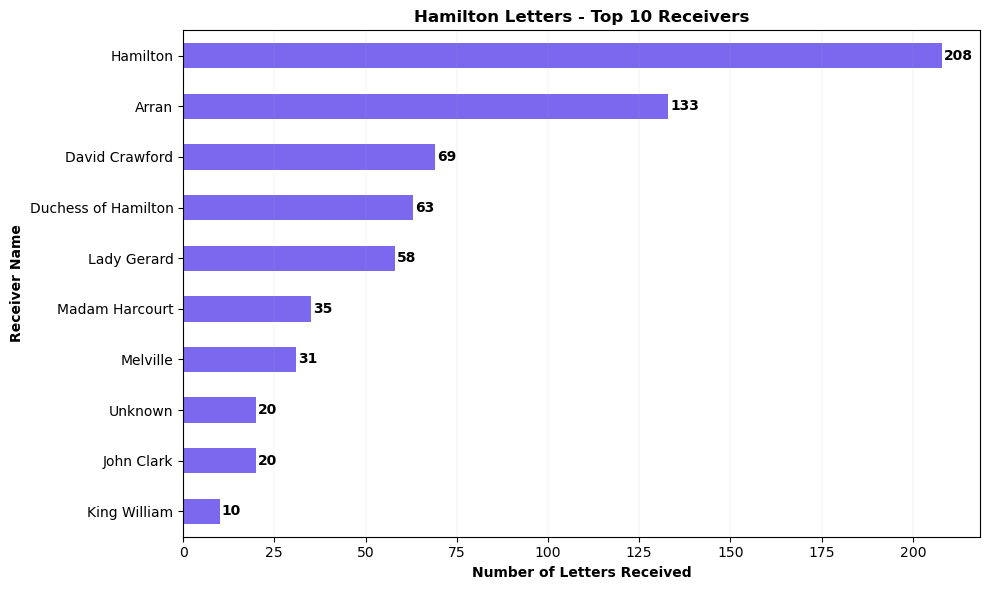

In [20]:
hamilton_top_receivers = receiver_count.head(10)

plt.figure(figsize=(10,6))
ax = hamilton_top_receivers.plot(kind='barh', color='mediumslateblue')

plt.xlabel("Number of Letters Received", weight='bold')
plt.ylabel("Receiver Name", weight='bold')
plt.title('Hamilton Letters - Top 10 Receivers', weight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(linewidth=0.1, axis='x')

for i, v in enumerate(hamilton_top_receivers):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

plt.show()


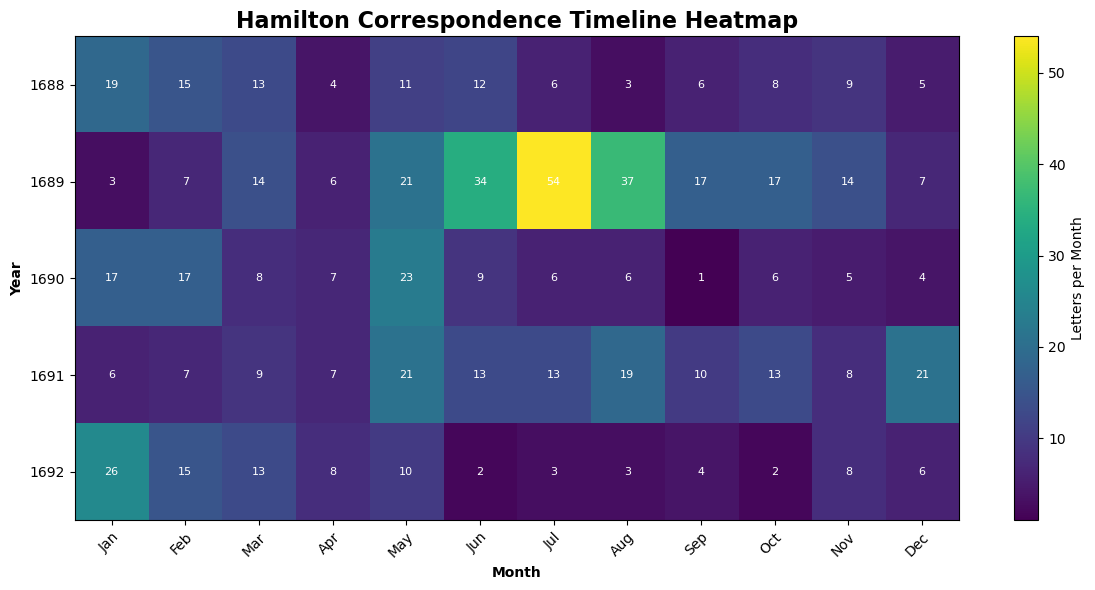

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

date_col = None
for col in hamilton_data.columns:
    if 'date' in col.lower():
        date_col = col
        break
if date_col is None:
    raise ValueError("No date column found — please check your CSV headers.")
hamilton_data[date_col] = pd.to_datetime(hamilton_data[date_col], errors='coerce')
hamilton_data = hamilton_data.dropna(subset=[date_col])

hamilton_data['Year'] = hamilton_data[date_col].dt.year
hamilton_data['Month'] = hamilton_data[date_col].dt.month

heatmap_data = hamilton_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

heatmap_data.columns = [calendar.month_abbr[int(m)] for m in heatmap_data.columns]
fig, ax = plt.subplots(figsize=(12, 6))
c = ax.imshow(heatmap_data, cmap='viridis', aspect='auto')

ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_yticks(range(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.columns)
ax.set_yticklabels(heatmap_data.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i, year in enumerate(heatmap_data.index):
    for j, month in enumerate(heatmap_data.columns):
        value = heatmap_data.loc[year, month]
        if value != 0:
            ax.text(j, i, int(value), ha='center', va='center', color='white', fontsize=8)

cbar = fig.colorbar(c, ax=ax)
cbar.set_label("Letters per Month")

ax.set_title("Hamilton Correspondence Timeline Heatmap", fontsize=16, fontweight='bold')
ax.set_xlabel("Month",fontweight='bold')
ax.set_ylabel("Year", fontweight='bold')

plt.tight_layout()
plt.show()

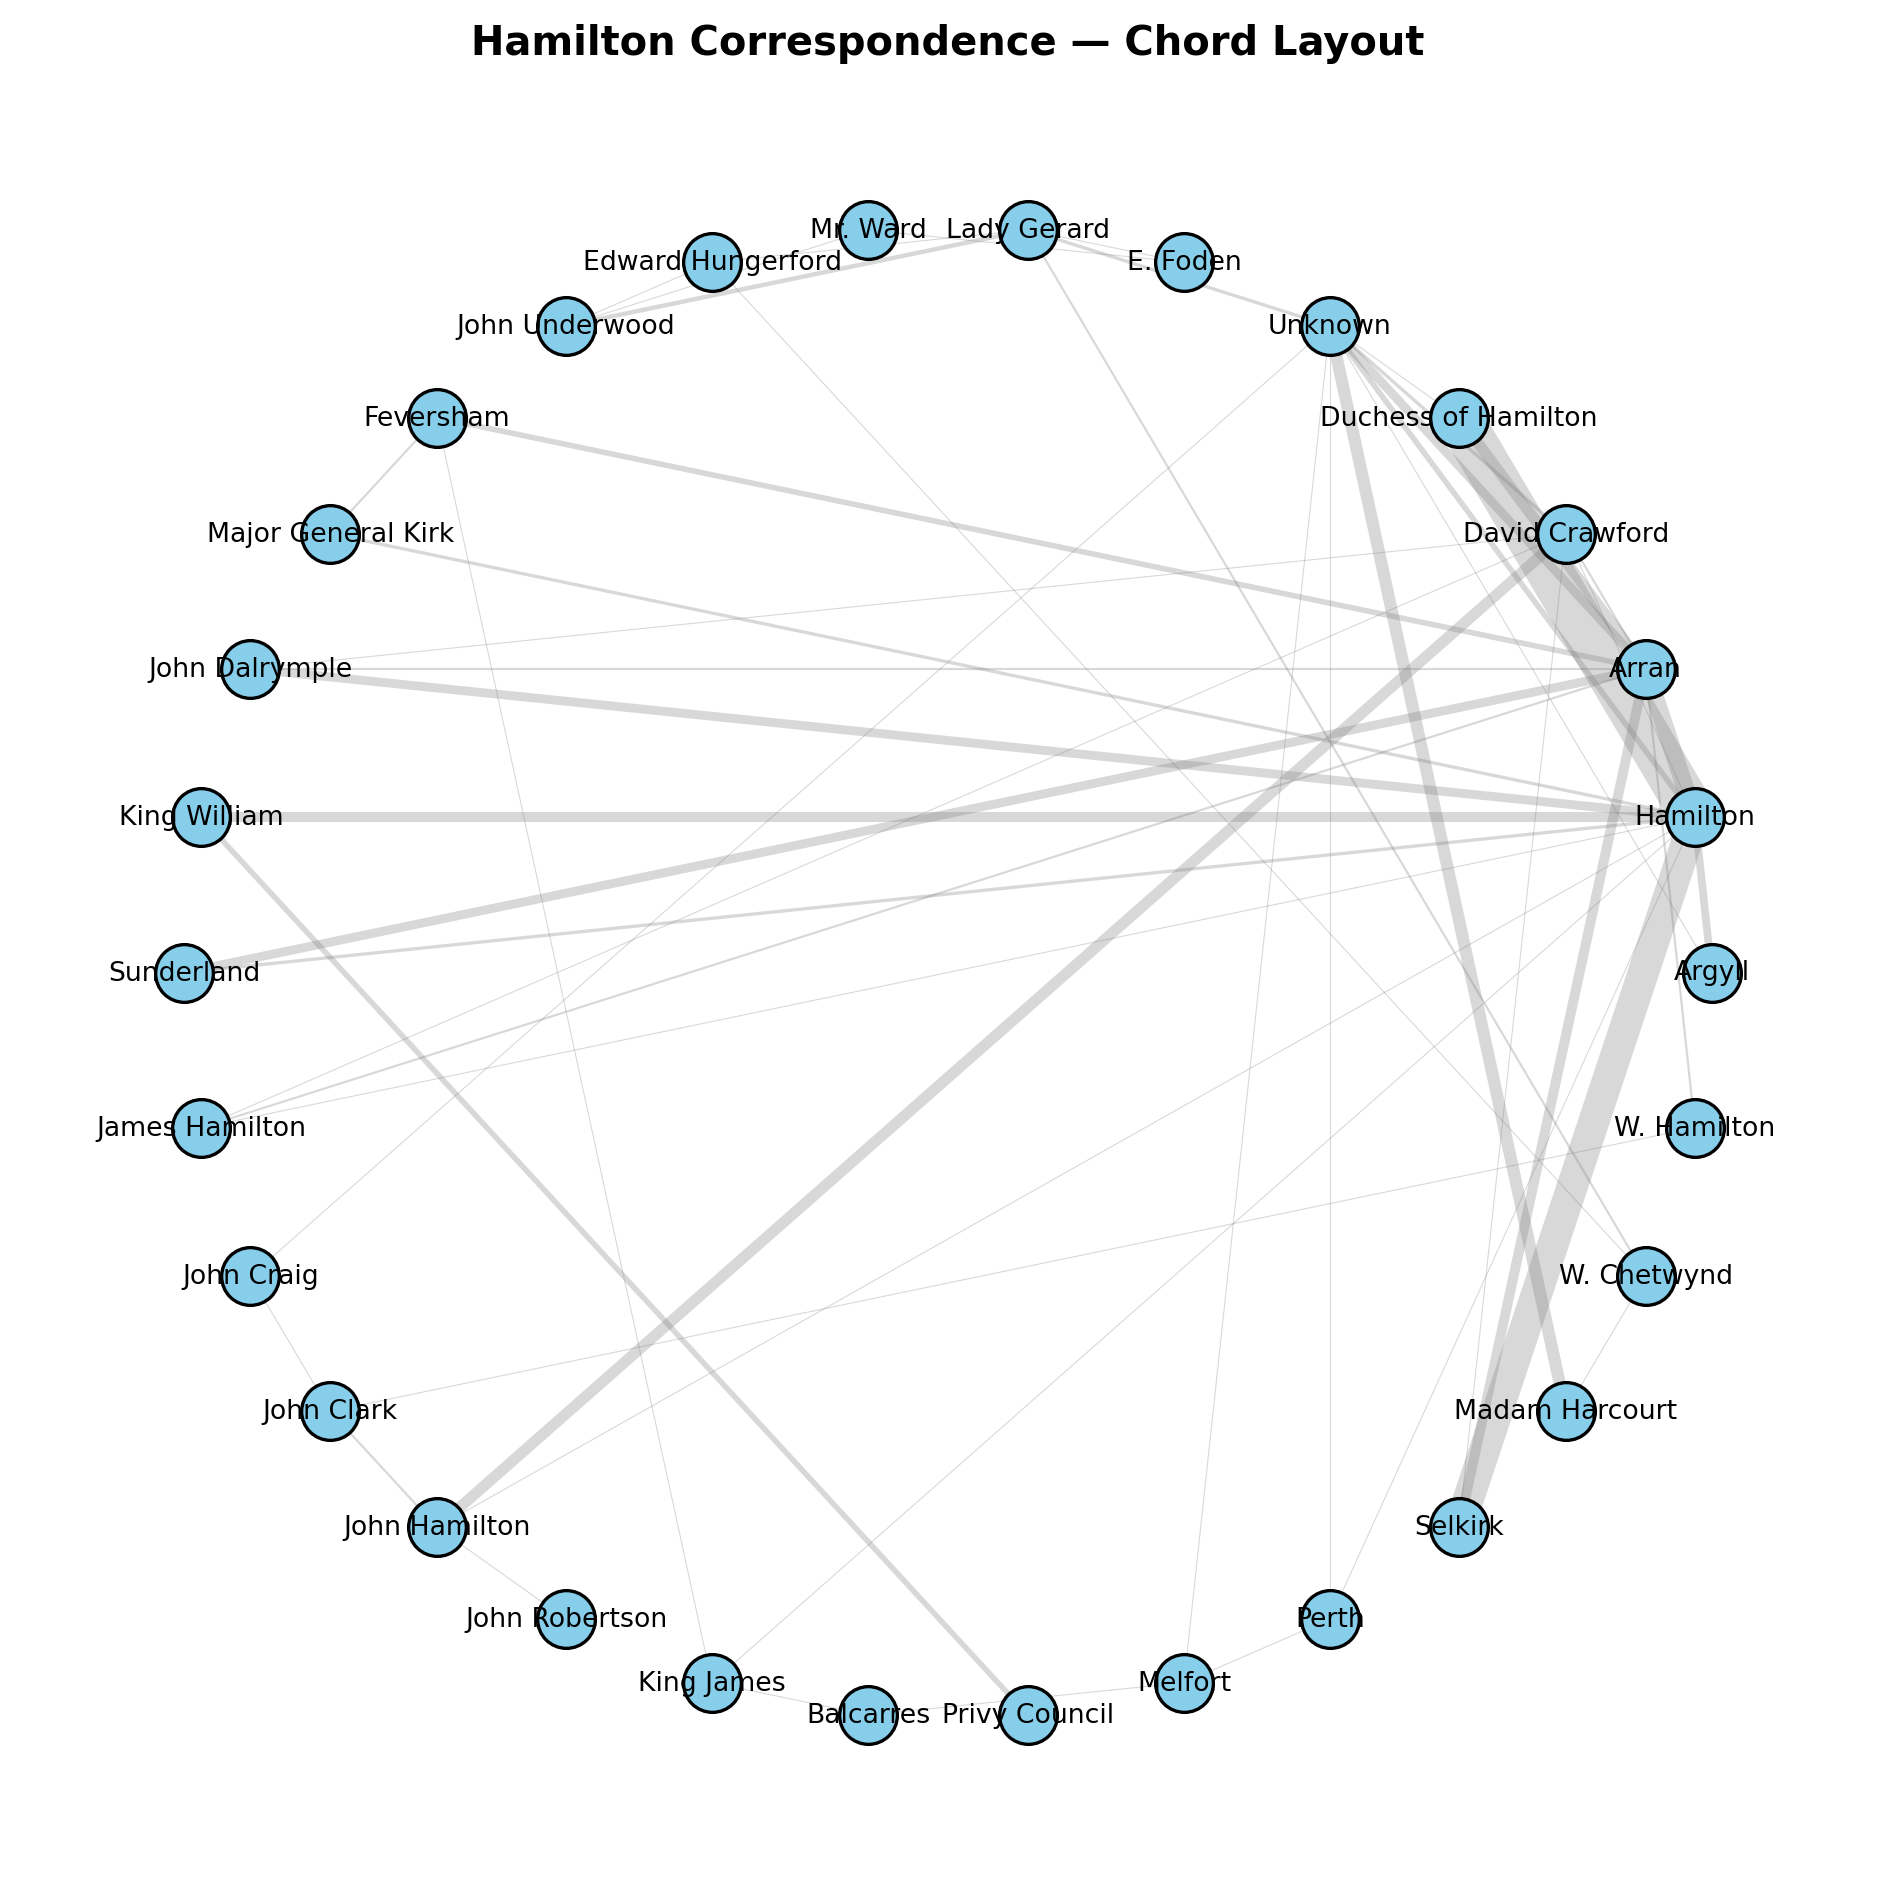

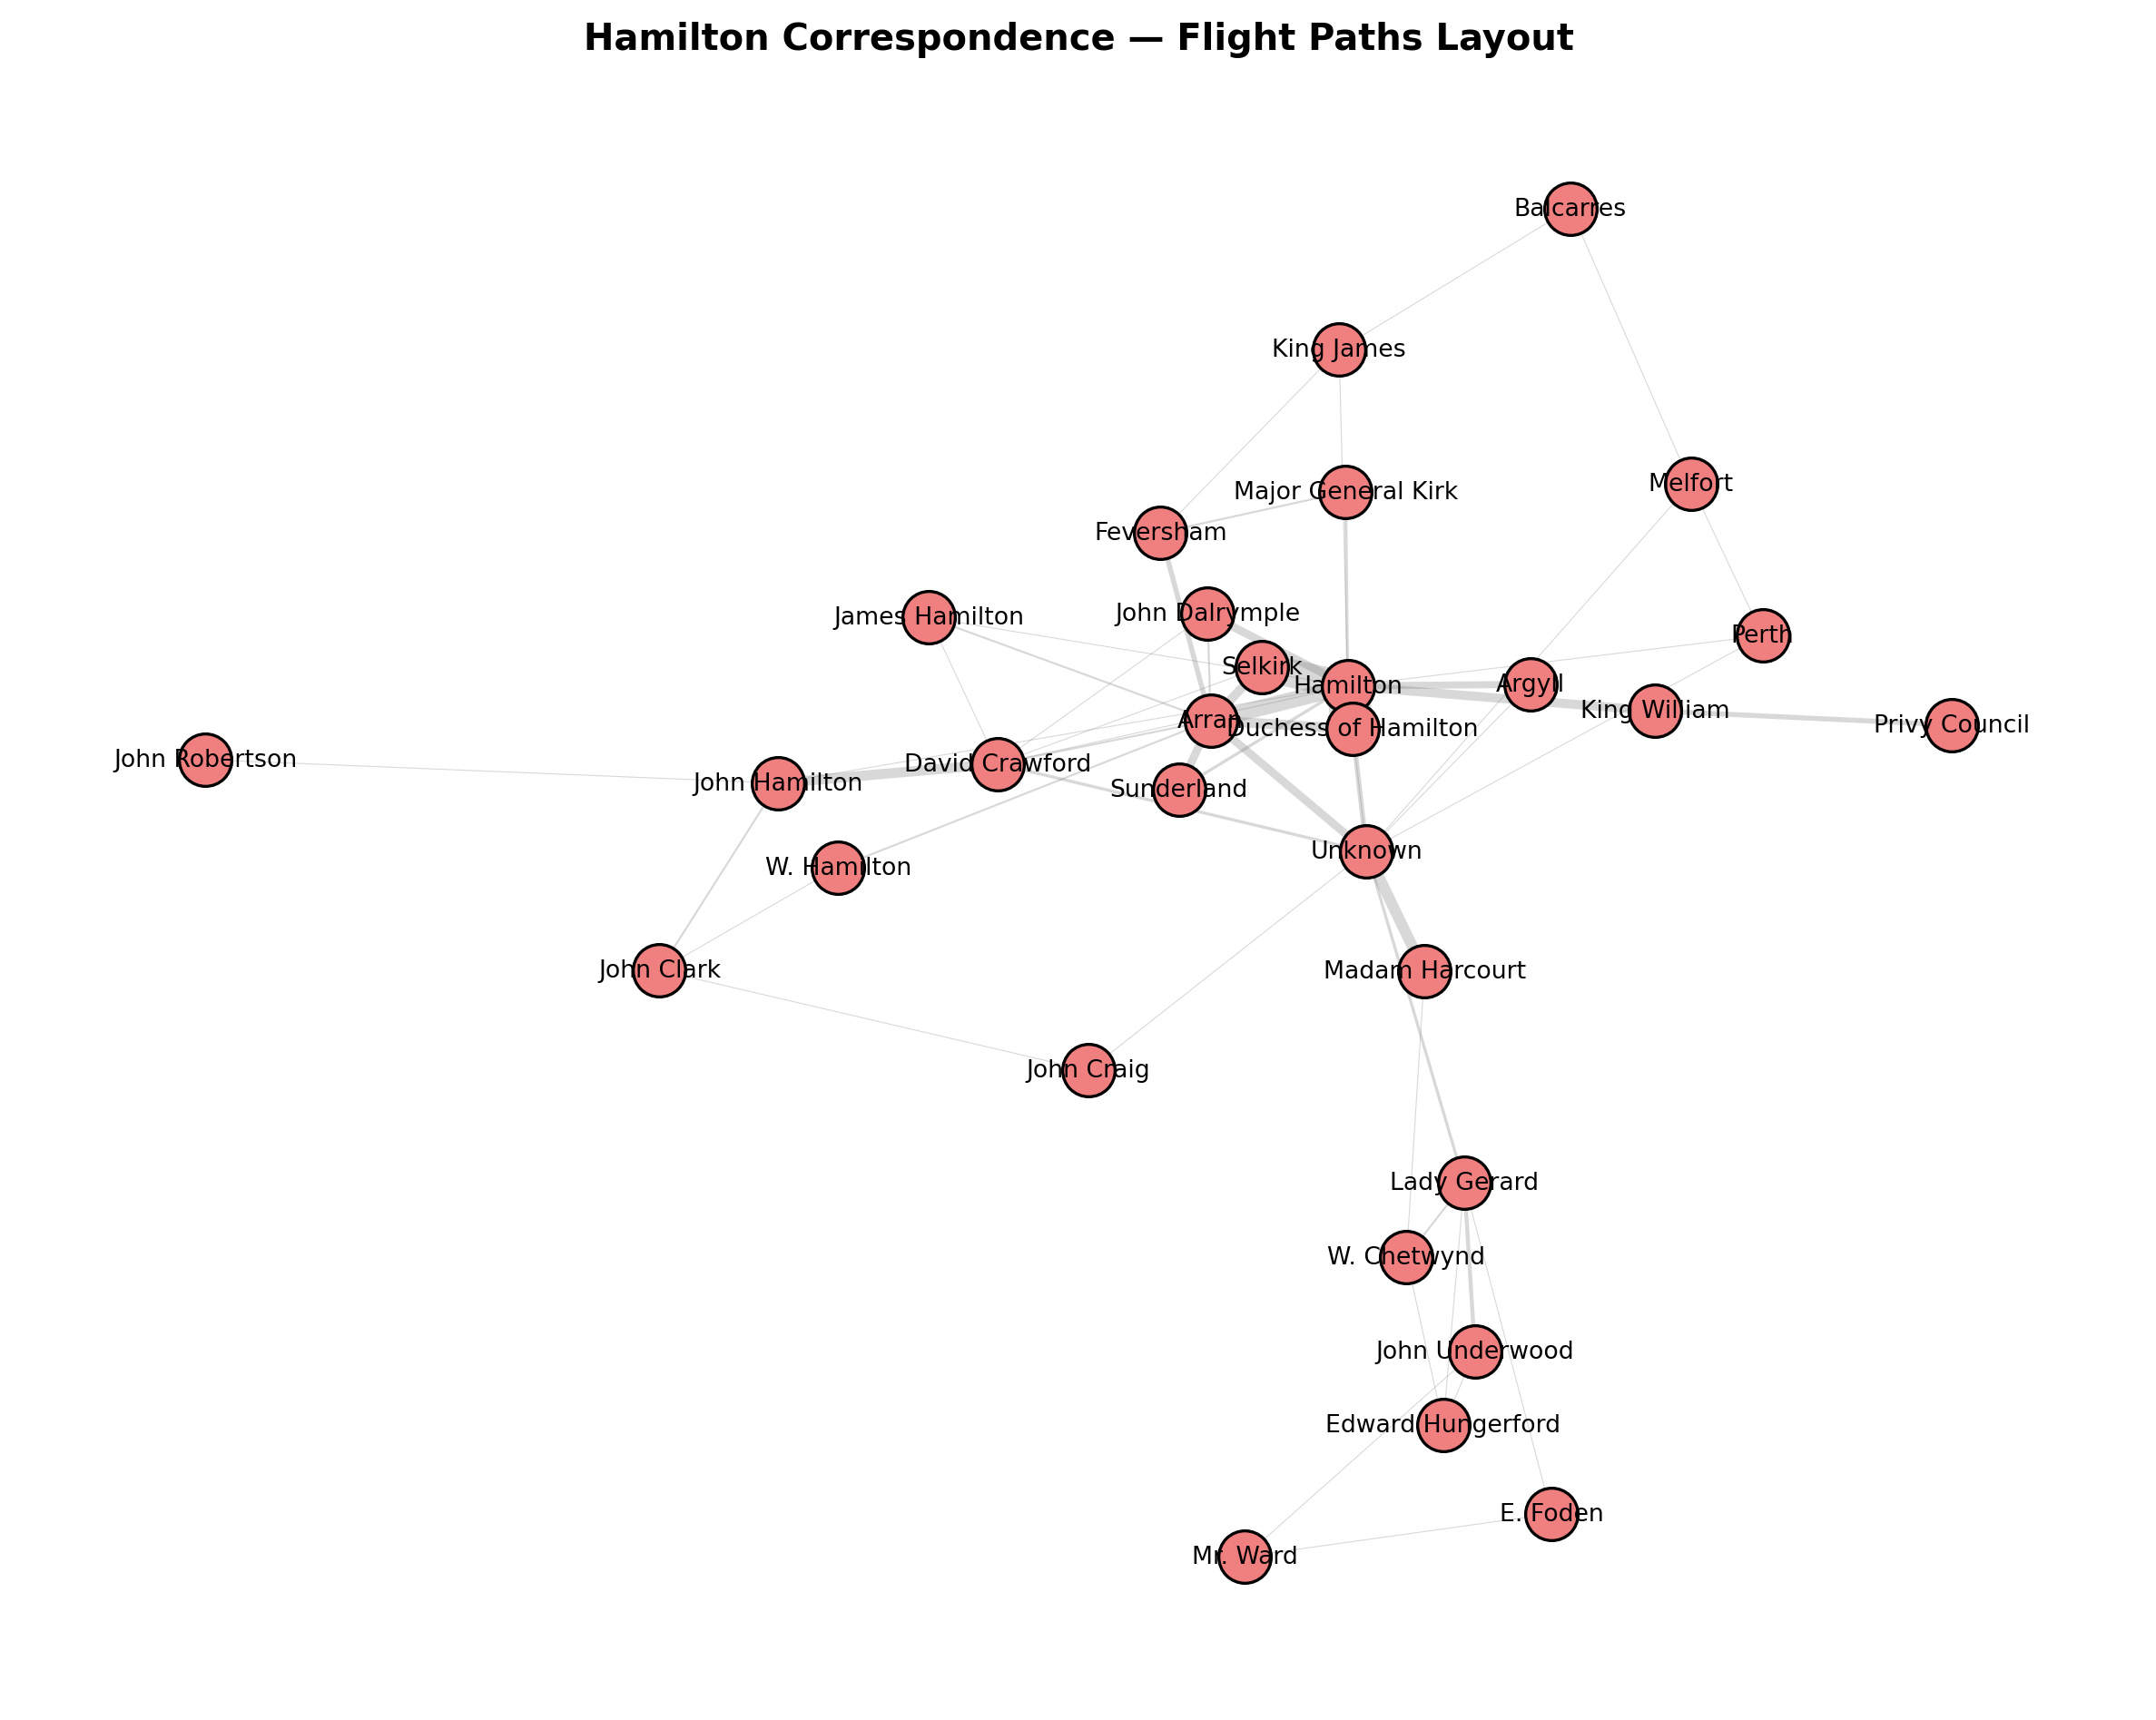

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

sender_col = 'From Name'
receiver_col = 'To Name'

edge_counts = (
    hamilton_data.groupby([sender_col, receiver_col])
    .size()
    .reset_index(name='count'))
top_n = 30
top_nodes = pd.concat([
    edge_counts[sender_col],
    edge_counts[receiver_col]
]).value_counts().head(top_n).index

edge_counts = edge_counts[
    edge_counts[sender_col].isin(top_nodes) &
    edge_counts[receiver_col].isin(top_nodes)]

G = nx.Graph()
for _, row in edge_counts.iterrows():
    G.add_edge(row[sender_col], row[receiver_col], weight=row['count'])

pos_circle = nx.circular_layout(G)

pos_spring = nx.spring_layout(G, seed=42, k=0.4) 

plt.figure(figsize=(8, 8))
edges = nx.draw_networkx_edges(G, pos_circle, alpha=0.3, width=[d['weight']/3 for _, _, d in G.edges(data=True)], edge_color='gray')
nodes = nx.draw_networkx_nodes(G, pos_circle, node_size=300, node_color='skyblue', edgecolors='black')
labels = nx.draw_networkx_labels(G, pos_circle, font_size=8)
plt.axis('off')
plt.title('Hamilton Correspondence — Chord Layout', fontweight='bold')
plt.tight_layout()
plt.savefig("hamilton_chord.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 8))
edges = nx.draw_networkx_edges(G, pos_spring, alpha=0.3, width=[d['weight']/3 for _, _, d in G.edges(data=True)], edge_color='gray')
nodes = nx.draw_networkx_nodes(G, pos_spring, node_size=300, node_color='lightcoral', edgecolors='black')
labels = nx.draw_networkx_labels(G, pos_spring, font_size=8)
plt.axis('off')
plt.title('Hamilton Correspondence — Flight Paths Layout', fontweight='bold')
plt.tight_layout()
plt.savefig("hamilton_flightpaths.png", dpi=300)
plt.show()
